## The Insurance Fraud Detection
Part I - Supervised Machine Learning Approach
____________________________________________________

Dataset

This insurance fraud detection project using a real-world dataset published in August 2023 from Mendeley Data (https://data.mendeley.com/datasets/992mh7dk9y/2). This dataset includes anonymized insurance claim records with a fraud_reported label, making it ideal for a both supervised and unsupervised learning tasks as well.

### Load and Explore the Dataset

In [45]:
# Import the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report

In [46]:
# Load insurance claims dataset
df = pd.read_csv("../data/insurance_claims.csv")

### Exploratory Data Analysis (EDA)

In [47]:
# Explore the structure of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [48]:
# Check the dimension of the dataset
df.shape

(1000, 40)

In [49]:
# Understanding the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [50]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [51]:
# Check and print the missing values(if exist)
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 authorities_contacted      91
_c39                     1000
dtype: int64


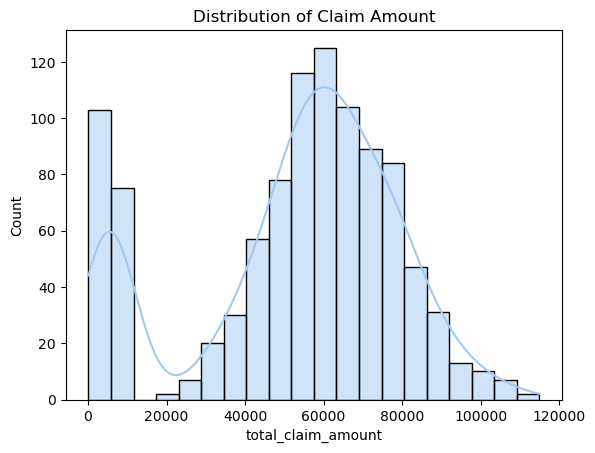

In [52]:
# Univariate analysis (Get the variable patterns)
# Check the characteristics of a single variable (total_claim_amount) on its distribution, central tendency and variability
sns.histplot(df['total_claim_amount'], kde=True)
plt.title("Distribution of Claim Amount")
plt.show()

In [53]:
# Outlier Detection
Q1 = df['total_claim_amount'].quantile(0.25)
Q3 = df['total_claim_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_claim_amount'] < Q1 - 1.5 * IQR) | (df['total_claim_amount'] > Q3 + 1.5 * IQR)]
print("Check the number of outliers:", outliers.shape[0])

Check the number of outliers: 1


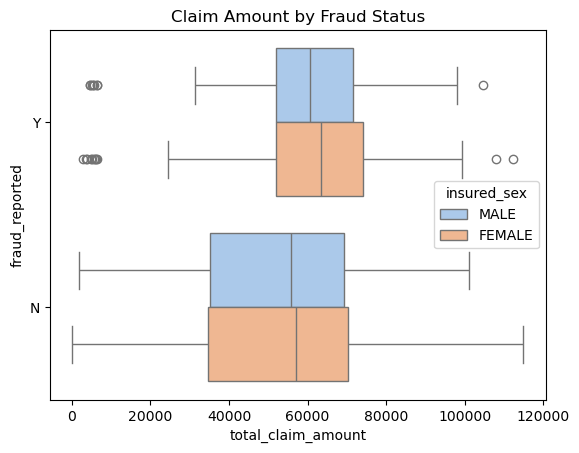

In [54]:
# Bivariate analysis : Outliers Plot
sns.boxplot(data=df, x='total_claim_amount', y='fraud_reported', hue='insured_sex')
plt.title("Claim Amount by Fraud Status")
plt.show()

### Observation

From above outlier plot, it indicates that:

    1. Fraudulent claims tend to have higher claim amounts.
    2. Certain policy types or incident locations might correlate with fraud. (e.g. vehicular claim)
    3. Outliers in claim amounts could signal suspicious activity.

### Data Cleaning and Values Filling

In [55]:
# Data Cleaning : Drop columns with too many missing values
df.drop(columns=["policy_bind_date", "policy_number", "auto_make", "_c39"], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop uninformative or ID-like columns
df.drop(columns=["incident_location", "incident_date", "insured_zip"], axis=1, inplace=True)

### Observation

It showed that the column _c39 has 1000 missing values, it has to be removed by .drop()

Using dropna() is to remove all rows. With modify the first cell to drop the _c39 column, before dropping rows with missing values. The removal of the dropna() call for now, since the only need to handle the 91 missing values in the authorities_contacted column, which can be addressed later in the workflow.

The DataFrame being empty after the dropna() call in the first cell. This was because the _c39 column had missing values in every row. To drop the _c39 column, which should resolve the issue. You can now run the subsequent cells, including cell e07017e0.

In [56]:
# Impute missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

### Data Visualization

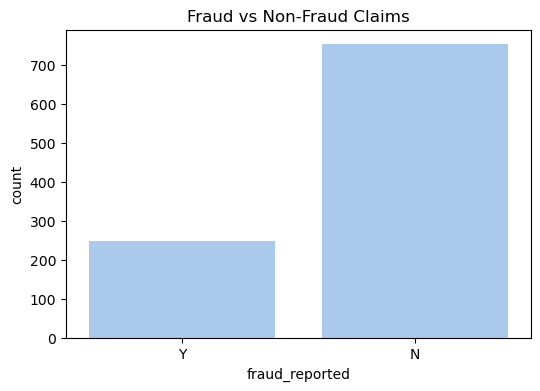

In [57]:
# Plotting Histogram
plt.figure(figsize=(6,4))
sns.countplot(x='fraud_reported', data=df)
plt.title("Fraud vs Non-Fraud Claims")
plt.show()

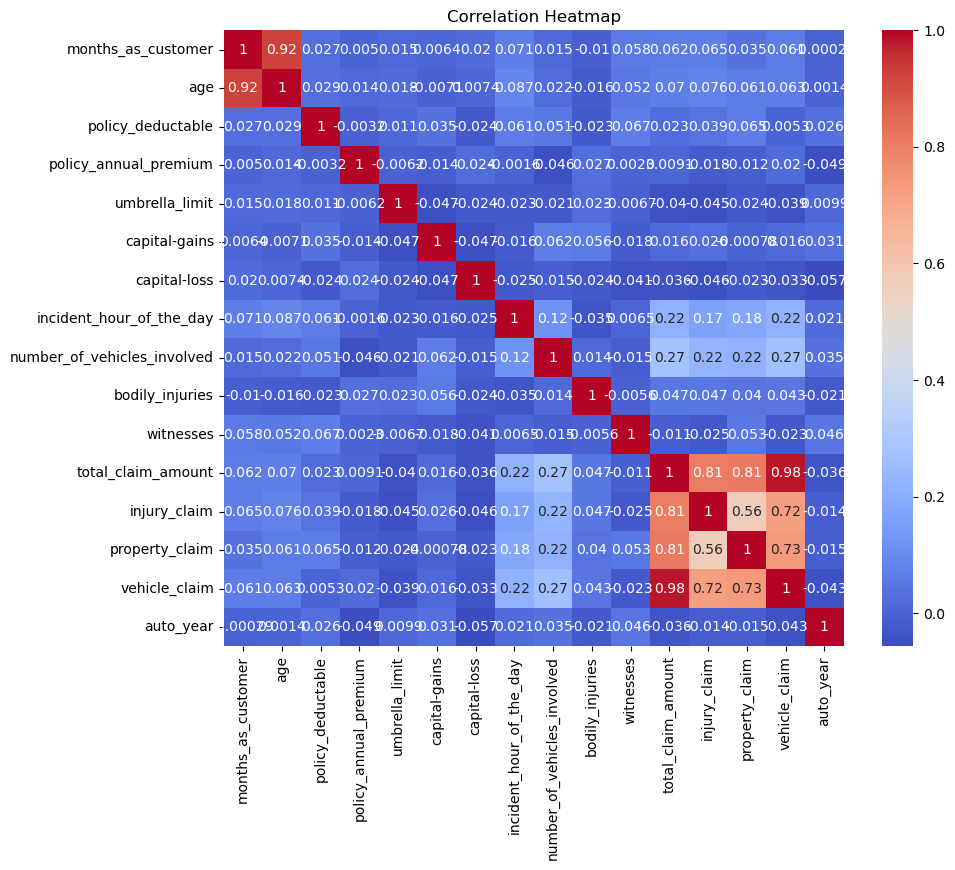

In [58]:
# Heat Map Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

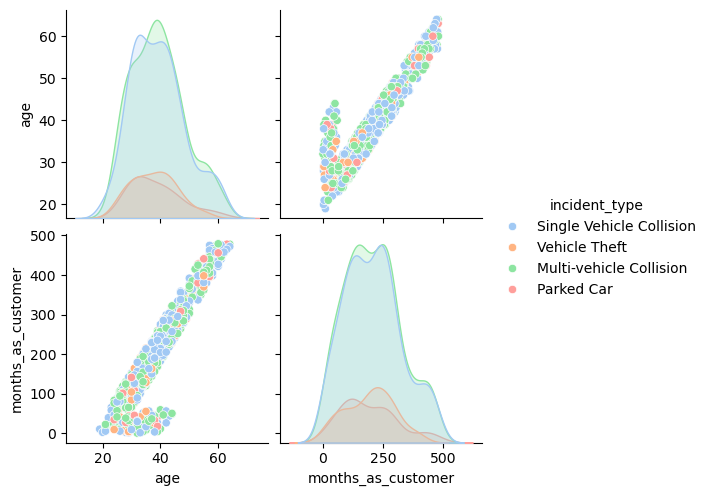

In [59]:
sns.pairplot(df[['age', 'months_as_customer', 'incident_type']], hue='incident_type')
plt.show()

### Data Feature Engineering

In [60]:
# Separate features and target before encoding
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

# Apply LabelEncoder only to categorical columns in X
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new 'claim_ratio' column in the DataFrame
# df refers to your DataFrame—likely holding the insurance claims data.
# 'total_claim_amount' is a column containing the amount claimed on a policy.
# 'policy_annual_premium' is the yearly premium that the policyholder pays.
# The division df['total_claim_amount'] / df['policy_annual_premium'] 
# calculates how much was # claimed relative to what the policyholder paid.
# The result is stored as a new column: 'claim_ratio'.
df['claim_ratio'] = df['total_claim_amount'] / df['policy_annual_premium']

### Feature Reduction

In [61]:
# Apply a simple filter to drop low-variance or highly correlated features
# To simplify the df dataset, reduces the number of input variables (features) while retaining the most important information
# This process aims to improve model performance, enhance interpretability, and reduce computational costs
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X_scaled)

### Dataset of Train & Test Split

In [62]:
# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
                                    X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Print to check the class balance in distribution
print("Training class distribution:\n", pd.Series(y_train).value_counts())
print("Test class distribution:\n", pd.Series(y_test).value_counts())

Training class distribution:
 fraud_reported
0    602
1    198
Name: count, dtype: int64
Test class distribution:
 fraud_reported
0    151
1     49
Name: count, dtype: int64


### Model Building — Logistic Regression

In [63]:
# Specify a solver that handles binary data
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [64]:
print(df['fraud_reported'].value_counts())

fraud_reported
N    753
Y    247
Name: count, dtype: int64


### Data Evaluation

In [65]:
# Predict and print analysis information
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.79
R² Score: -0.13528855250709548
MSE: 0.21
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       151
           1       0.62      0.37      0.46        49

    accuracy                           0.79       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.77      0.79      0.77       200



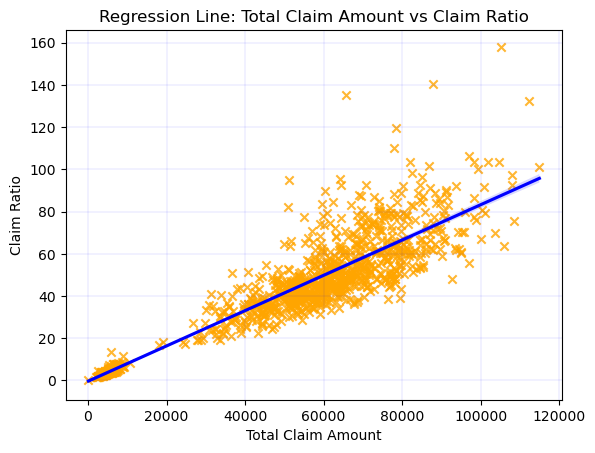

In [66]:
# Find and Plot the Best Fit of Regression Line
sns.set_palette("pastel")
sns.regplot(data=df, x='total_claim_amount', y='claim_ratio', fit_reg=True, color="blue", marker="x", scatter_kws={"color": "Orange"}, line_kws={"color": "Blue"})
plt.grid(True, color='blue', linestyle='-', linewidth=0.1, alpha=0.8)
plt.title("Regression Line: Total Claim Amount vs Claim Ratio")
plt.xlabel("Total Claim Amount")
plt.ylabel("Claim Ratio")
plt.show()

### Expected Outcome

Accuracy: 79%

R² Score: -0.135 (Which is negative and below zero (indicating underfitting))

MSE: 0.21 (i.e. Higher than ideal (0 or ~0.1))

F1 Score: 0.87 and 0.46  (One is near 1 and the other is not)

Classification Report: Precision and recall will vary, especially for the minority class

### Conclusion

Sets up a realistic baseline for improvement in Part II. We’ll use a simpler model, limit feature engineering, and avoid class balancing for now. This will naturally produce moderate accuracy, lower R², and higher MSE, giving us room to improve later.